In [1]:
%load_ext autoreload
%autoreload 2

# Load and plot measurements of WB417. Compare with model

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pvcircuit as pvc
import ipywidgets as widgets
%matplotlib inline
#import ipympl
#%matplotlib widget

In [19]:
# data iv3T vs V
path = '../data/'
fileA = 'WB417n8_Cpapy_CZ_JA.csv'
fileB = 'WB417n8_Cpapy_CZ_JB.csv'
WB417_CZ_V_dataiv = pvc.IV3T.loadcsv('WB417_CZ_V_dataiv',path,fileA,fileB,'V','CZ') 
# data iv3T vs I
fileA = 'WB417n8_Cpapy_CZ_VA.csv'
fileB = 'WB417n8_Cpapy_CZ_VB.csv'
WB417_CZ_I_dataiv = pvc.IV3T.loadcsv('WB417_CZ_I_dataiv',path,fileA,fileB,'I','CZ') 

In [20]:
# model
WB417dev3T = pvc.Tandem3T()
WB417dev3T.set(name='WB417dev3T', Rz = 2.3)
WB417dev3T.top.set(Eg=1.87, J0ratio=[ 80., 22.], Jext=0.0131, Gsh=1e-8)   
WB417dev3T.bot.set(Eg=1.419, J0ratio=[10., 15.], Jext=0.0128, Gsh= 5e-5)
WB417dev3T.bot.set(Rser=0.2, beta=5, area=0.89,  RBB='JFG')
# special points of model
WB417_CZ_fitsp = WB417dev3T.specialpoints(meastype = 'CZ')  # calculate special points of fit
WB417_CZ_fitsp.set(name='WB417_CZ_V_fitsp')
WB417_CZ_fitsp

WB417_CZ_V_fitsp: <tandem.IV3T class>
{'name': 'WB417_CZ_V_fitsp', 'meastype': 'CZ', 'shape': (6,)}
sizes(6, 6)

  #      mIro     mIzo     mIto     Vzt      Vrz      Vtr      mIA      mIB       VA       VB     mPtot    mIxhex   mIyhex   Vxhex    Vyhex  
 Voc3   0.00     0.00     0.00     1.442    1.044   -2.485    0.00     0.00     1.044   -1.442    0.00     0.00     0.00     2.777    1.205  
 Isc3  -11.39    -1.73    13.10    0.000    0.000   -0.000   -11.39    13.10    0.000    0.000    0.00    -17.32    -1.98    0.000    0.000  
VrzIto -11.76    11.76    0.00     1.469   -0.000   -1.469   -11.76    0.00    -0.000   -1.469    -0.00    -8.32    13.58    2.077   -0.000  
VztIro  0.00    -13.10    13.10    0.000    1.073   -1.073    0.00     13.10    1.073   -0.000    0.00     -9.26   -15.13    0.758    1.238  
VtrIzo -12.57    0.00     12.57    1.309   -1.310    0.001   -12.57    12.57   -1.310   -1.309    -0.01   -17.78    -0.00    0.926   -1.513  
 MPP   -10.82    -1.82    12.66    

In [4]:
# iv3T of model vs V
WB417_CZ_V_fitiv = WB417_CZ_V_dataiv.copy() # use same range
WB417_CZ_V_fitiv.set(name='WB417_CZ_V_fitiv', meastype = 'CZ')
WB417dev3T.I3Trel(WB417_CZ_V_fitiv)  # calculate fit
# iv3T of model vs I
WB417_CZ_I_fitiv = WB417_CZ_I_dataiv.copy() # use same range
WB417_CZ_I_fitiv.set(name='WB417_CZ_I_fitiv', meastype = 'CZ')
WB417dev3T.I3Trel(WB417_CZ_I_fitiv)  # calculate fit

0

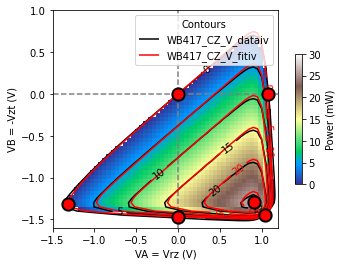

In [21]:
plt.show(block=True)
Vdataplot = WB417_CZ_V_dataiv.plot()  #plot data
Vfig, Vax, Vobjs = WB417_CZ_V_fitiv.plot(inplot = Vdataplot, cmap=None, ccont='red')  # plot model in red on data in black
WB417_CZ_fitsp.addpoints(Vax, 'red' )

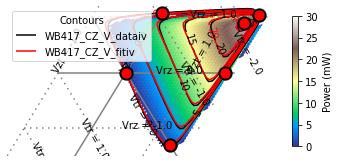

In [22]:
Vhexargs = {'xkey':'Vxhex', 'ykey':'Vyhex'}
Vhdataplot = WB417_CZ_V_dataiv.plot(**Vhexargs)  #plot data
Vhfig, Vhax, Vhobjs = WB417_CZ_V_fitiv.plot(inplot = Vhdataplot, cmap=None, ccont='red', **Vhexargs)  # plot model in red on data in black
WB417_CZ_fitsp.addpoints(Vhax,'red', **Vhexargs )

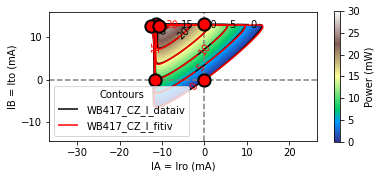

In [23]:
Idataplot = WB417_CZ_I_dataiv.plot()  #plot data
Ifig, Iax, Iobjs = WB417_CZ_I_fitiv.plot(inplot = Idataplot, cmap=None, ccont='red')  # plot model in red on data in black
WB417_CZ_fitsp.addpoints(Iax, 'red', 'IA', 'IB' )

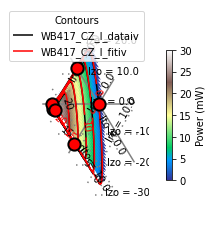

In [24]:
Ihexargs = {'xkey':'Ixhex', 'ykey':'Iyhex'}
Ihdataplot = WB417_CZ_I_dataiv.plot(**Ihexargs)  #plot data
Ihfig, Ihax, Ihobjs = WB417_CZ_I_fitiv.plot(inplot = Ihdataplot, cmap=None, ccont='red', **Ihexargs)  # plot model in red on data in black
WB417_CZ_fitsp.addpoints(Ihax, 'red', **Ihexargs )

In [25]:
WB417dev3T.bot.set(beta=100) # unphysical but should show a change special point VrzIto
# special points of model
WB417_CZ_fitsp = WB417dev3T.specialpoints(meastype = 'CZ')  # calculate special points of fit
WB417_CZ_fitsp.set(name='WB417_CZ_V_fitsp')
WB417_CZ_fitsp

WB417_CZ_V_fitsp: <tandem.IV3T class>
{'name': 'WB417_CZ_V_fitsp', 'meastype': 'CZ', 'shape': (6,)}
sizes(6, 6)

  #      mIro     mIzo     mIto     Vzt      Vrz      Vtr      mIA      mIB       VA       VB     mPtot    mIxhex   mIyhex   Vxhex    Vyhex  
 Voc3   0.00     0.00     0.00     1.442    1.062   -2.504    0.00     0.00     1.062   -1.442    0.00     0.00     0.00     2.790    1.226  
 Isc3  -11.39    -1.73    13.10    0.000    0.000   -0.000   -11.39    13.10    0.000    0.000    0.00    -17.32    -1.98    0.000    0.000  
VrzIto -18.87    18.87    0.00     1.485   -0.000   -1.485   -18.87    0.00    -0.000   -1.485    -0.00   -13.34    21.79    2.100   -0.000  
VztIro  0.00    -13.10    13.10    0.000    1.073   -1.073    0.00     13.10    1.073   -0.000    0.00     -9.26   -15.13    0.758    1.238  
VtrIzo -12.60    0.00     12.60    1.307   -1.308    0.001   -12.60    12.60   -1.308   -1.307    -0.01   -17.82    -0.00    0.924   -1.510  
 MPP   -10.82    -1.86    12.66    

In [26]:
plt.isinteractive()

True

In [27]:
plt.show(block=True)